In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm, trange

In [4]:
def get_path(seed=1492, N=10, xlimit=(-5,3), linea='o--', direcciones=10):
    angulo = 360/direcciones

    np.random.seed(seed)
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x = [0.]
    c_y = [0.]
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
        
    plt.plot(c_x, c_y, linea)
    plt.xlim(xlimit)

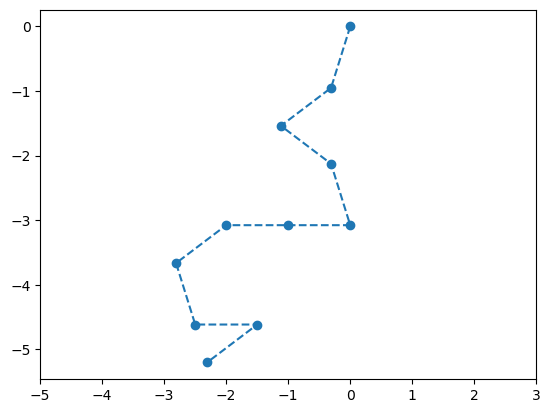

In [5]:
# Con 10 pasos
get_path()

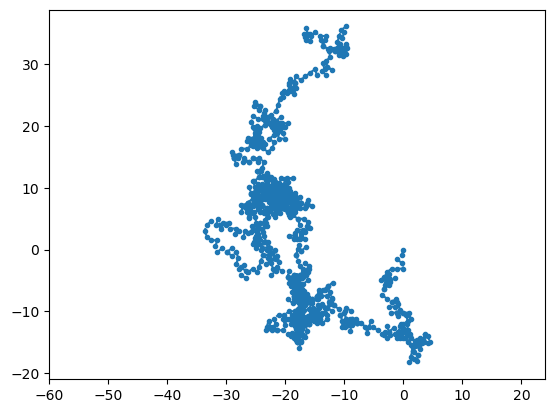

In [6]:
# Con 1000 pasos
get_path(N=1000, xlimit=(-60,24), linea='.--')

In [8]:
def get_path_origin(N=10, direcciones=10):
    angulo = 360/direcciones
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x, c_y = [0.], [0.]
    
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
    
    c_x_r,c_y_r = np.round(c_x, 2), np.round(c_y, 2)
    x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

    origenes = []
    for x, y in zip(x_0, y_0):
        if x == y:
            origenes.append(x)

    return origenes
    

In [80]:
theory=[]
for direcciones in range(4, 35, 2):
    theory.append((direcciones, 1/direcciones))

In [86]:
times = 100000
probabilidad = []
for direcciones in trange(4, 35, 2):
    regresa = []
    for i in range(times):
        origenes = get_path_origin( N=100, direcciones=direcciones)
        r = any(origenes)
        regresa.append(r)      
    probabilidad.append((direcciones, len(np.where(regresa)[0])/times))

  0%|          | 0/16 [00:00<?, ?it/s]

<BarContainer object of 16 artists>

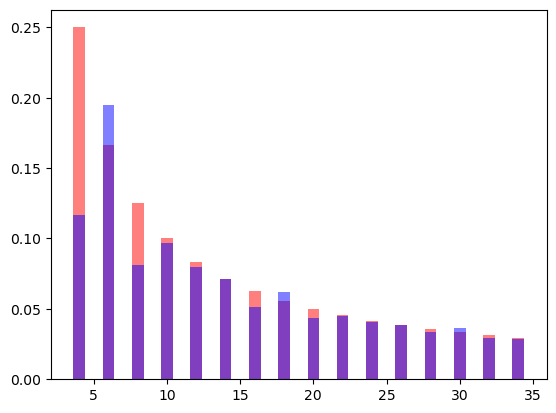

In [87]:
theory_p = [x for x in theory if x[0] % 2 == 0]
probabilidad_p = [x for x in probabilidad if x[0] % 2 == 0]
th = theory
pr = probabilidad
plt.bar(*zip(*th), color='red', alpha=0.5)
plt.bar(*zip(*pr), color='blue', alpha=0.5)

<BarContainer object of 16 artists>

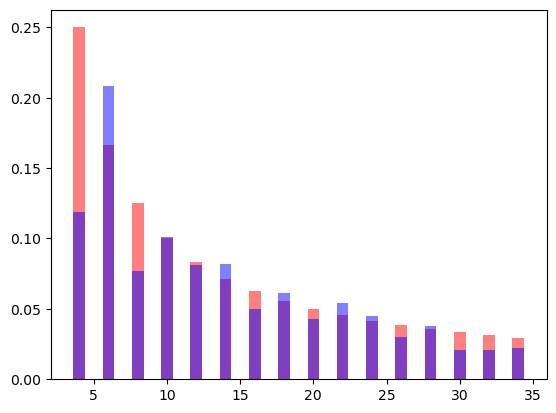

In [82]:
th = theory_p
pr = probabilidad_p
plt.bar(*zip(*th), color='red', alpha=0.5)
plt.bar(*zip(*pr), color='blue', alpha=0.5)

In [172]:
def get_origin_probability(iteraciones=1000, pasos = 100000):
    llego=[]
    for _ in trange(iteraciones):

        nums = [np.random.randint(10) for i in range(pasos)]
        angulos = [(x*36)*math.pi/180 for x in nums]
        
        x_coor = [math.cos(angulo) for angulo in angulos]
        y_coor = [math.sin(angulo) for angulo in angulos]
        c_x = [0.]
        c_y = [0.]
        for x, y in zip(x_coor, y_coor):
            c_x.append(c_x[-1] + x)
            c_y.append(c_y[-1] + y)
        c_x_r = np.round(c_x, 4)
        c_y_r = np.round(c_y, 4)

        x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

        origenes = []
        for x, y in zip(x_0, y_0):
            if x == y:
                origenes.append(x)

        llego.append(any(origenes))

    return len(np.where(llego)[0])/iteraciones

In [173]:
probabilidades = []
for pasos in tqdm([1000, 50000, 100000, 200000]):
    for iteraciones in tqdm([100, 5000, 10000]):
        print(f'Pasos: {pasos}, Iteraciones: {iteraciones}', end=' ')
        probabilidad = get_origin_probability(pasos=pasos, iteraciones=iteraciones)
        print(f'Probabilidad: {probabilidad}')
        probabilidades.append(probabilidad)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Pasos: 1000, Iteraciones: 100 

  0%|          | 0/100 [00:00<?, ?it/s]

Probabilidad: 0.13
Pasos: 1000, Iteraciones: 5000 

  0%|          | 0/5000 [00:00<?, ?it/s]

Probabilidad: 0.0998
Pasos: 1000, Iteraciones: 10000 

  0%|          | 0/10000 [00:00<?, ?it/s]

Probabilidad: 0.0975


  0%|          | 0/3 [00:00<?, ?it/s]

Pasos: 50000, Iteraciones: 100 

  0%|          | 0/100 [00:00<?, ?it/s]

Probabilidad: 0.08
Pasos: 50000, Iteraciones: 5000 

  0%|          | 0/5000 [00:00<?, ?it/s]

Probabilidad: 0.092
Pasos: 50000, Iteraciones: 10000 

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 